<a href="https://colab.research.google.com/github/Pakhi27/Titanic-Dataset-Adaboost-and-Gradient-Boost/blob/main/Titanic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Titanic Dataset Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tested.csv')


In [ ]:
dataset=pd.DataFrame(df)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Exploratory Data Analysis

In [ ]:
#missing values
#true means null or nan value

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

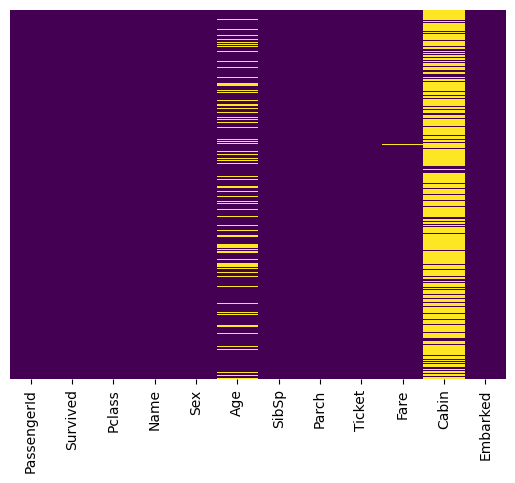

In [ ]:
# yellow means null value
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

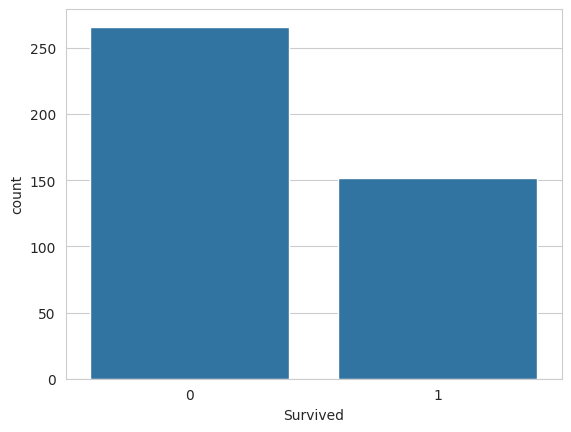

In [ ]:
# analysis of how many people survived or not
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

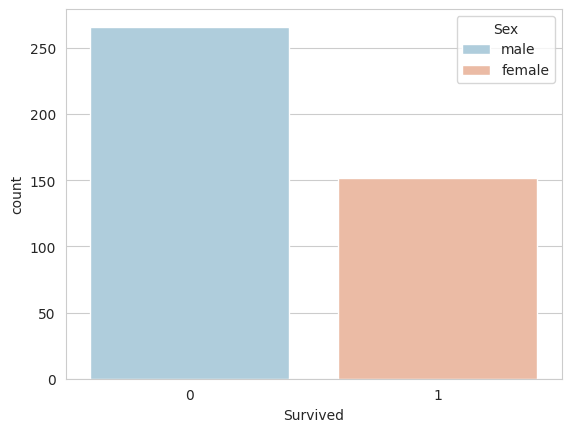

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

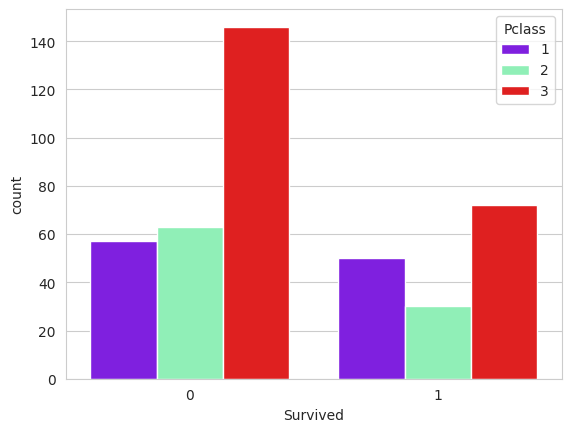

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')
# pclass=1=richer class and then so on

<ipython-input-10-daea287934f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='red',bins=40)


<Axes: xlabel='Age'>

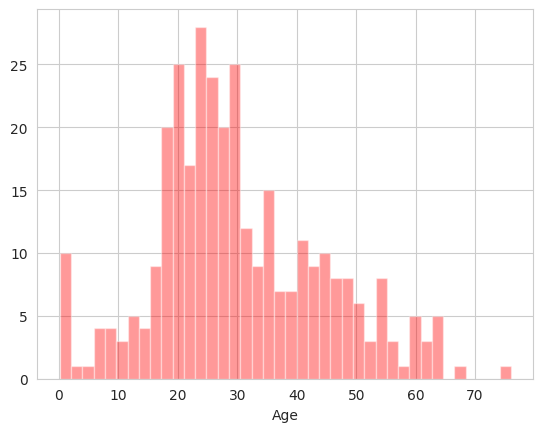

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,color='red',bins=40)
# drop values,kde=probability density function,distplot gives histogram(helps to find frequency)-count of the pople in a particular age group

<Axes: >

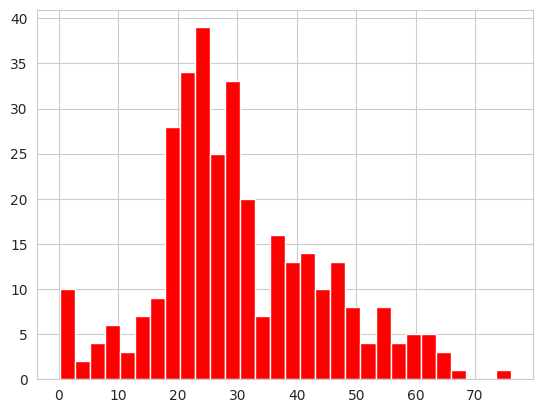

In [ ]:
df['Age'].hist(bins=30,color='red')

<Axes: xlabel='SibSp', ylabel='count'>

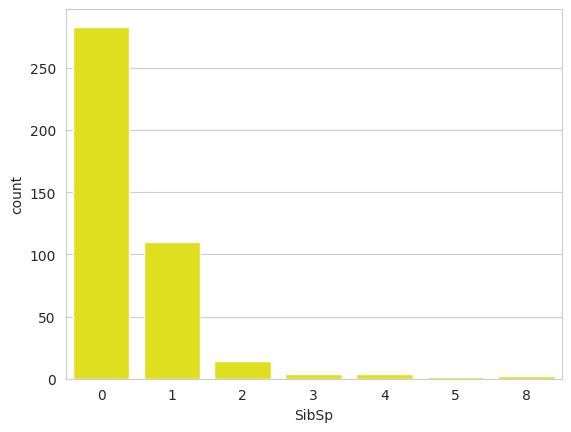

In [ ]:
sns.countplot(x='SibSp',data=df,color='yellow')

<Axes: >

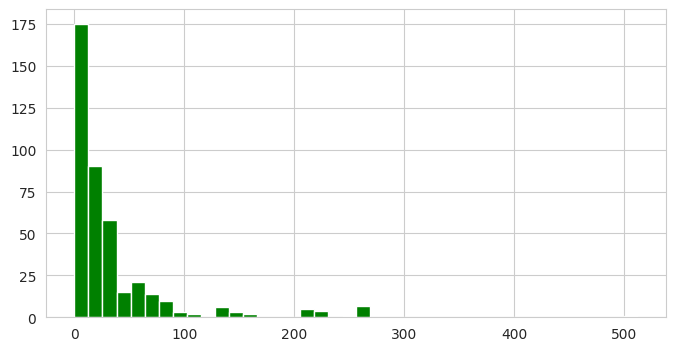

In [ ]:
df['Fare'].hist(color='green', bins=40, figsize=(8, 4))


Data Cleaning

<ipython-input-10-f3eb059e0792>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

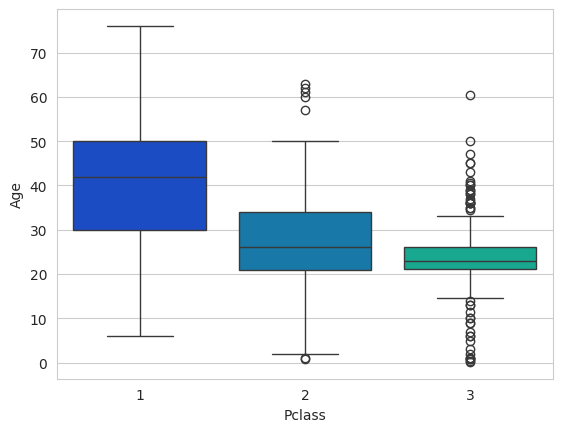

In [ ]:
# plt.figure(figsize(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [ ]:
# replacing null values with the average age for each passenger class
def impute_age(cols):
   Age=cols[0]
   Pclass=cols[1]

   if pd.isnull(Age):

    if Pclass==1:
       return 42
    elif Pclass==2:
       return 25
    else:
       return 23
   else:
    return Age

In [ ]:
# check for every age and replace missing values according to impute age function
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

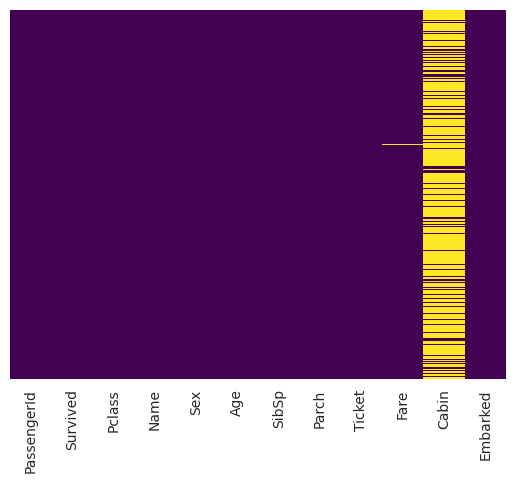

In [ ]:
# null values from age have been removed
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

<Axes: >

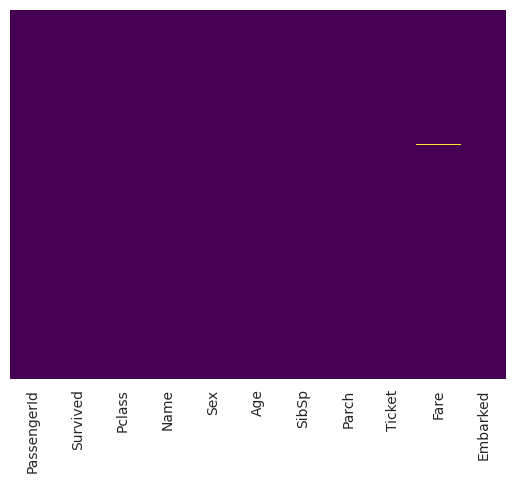

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
null_column = 'Fare'

# Drop rows with any null value in the specified column(s)
df.dropna(subset=[null_column],axis=0,inplace=True)

<Axes: >

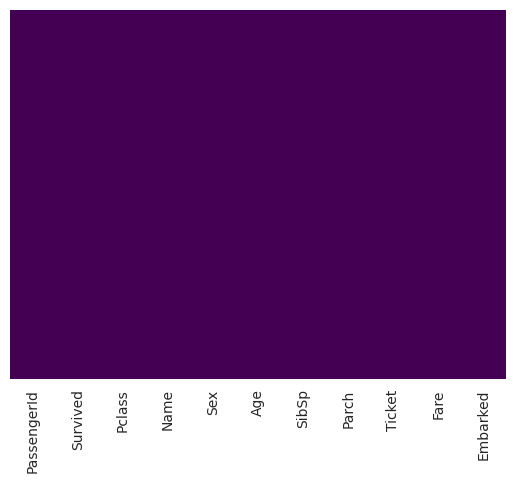

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# converting categorical values

In [ ]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


In [ ]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [ ]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [ ]:
df=pd.concat([df,sex,embark],axis=1)

In [ ]:
duplicate_cols = df.filter(like="male")  # Adjust the pattern for your column names
column_to_drop_index = duplicate_cols.columns[1]  # Assuming you want to drop the second occurrence

# # Drop the column at the specified index
df = df.drop(column_to_drop_index,axis=1)
# df = df.T.drop_duplicates().T

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
df=pd.concat([df,sex],axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male
0,892,0,3,34.5,0,0,7.8292,True,True,False,True
1,893,1,3,47.0,1,0,7.0000,False,False,True,False
2,894,0,2,62.0,0,0,9.6875,True,True,False,True
3,895,0,3,27.0,0,0,8.6625,True,False,True,True
4,896,1,3,22.0,1,1,12.2875,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,23.0,0,0,8.0500,True,False,True,True
414,1306,1,1,39.0,0,0,108.9000,False,False,False,False
415,1307,0,3,38.5,0,0,7.2500,True,False,True,True
416,1308,0,3,23.0,0,0,8.0500,True,False,True,True


In [ ]:
# Building a Logistic Regression Model

In [ ]:
#  survived-dependent feature
X=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
df['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x_train-This will contain the training features (all columns except "Survived") for the model.
# x_test-This will contain the testing features for evaluating the model's performance.
# y-train-This will contain the training target variable (survival labels) used for training the model.
# y-test-This will contain the testing target variable (survival labels) used for evaluating the model's performance on unseen data.
#  test_size=0.30 means 30% of the data will be allocated to the testing set
# random state-Using a fixed random seed ensures reproducibility, meaning you'll get the same split of data each time you run the code.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [ ]:
# Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# df = df[df['Survived'] != 'unknown']
df['Survived'] = df['Survived'].replace('unknown', np.nan)

In [ ]:
df = df.dropna(axis=0)

In [ ]:
# logmodel=LogisticRegression()
# logmodel.fit(X_train,y_train)
# X_train
# y_train
# type(y_train)
# y_train.info()
print(y_train.dtype)
y_train = y_train.astype(int)
print(y_train.dtype)

int64
int64


In [ ]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(y_test.dtype)

int64


In [ ]:
print(y_test.dtype)
y_test = y_test.astype(int)
print(y_test.dtype)

int64
int64


In [ ]:
# Identify rows with "unknown" in the target variable (y_test)
unknown_mask = y_test == 'unknown'

# Filter both X_test and y_test using the mask
X_test_filtered = X_test[~unknown_mask]
y_test_filtered = y_test[~unknown_mask]

In [ ]:
print(y_test_filtered.shape)

(126,)


In [ ]:
print(f"Unique values in y_test: {y_test.unique()}")

Unique values in y_test: [0 1]


In [ ]:
predictions=logmodel.predict(X_test_filtered)

In [ ]:
print(predictions.dtype)

int64


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test_filtered,predictions)

In [ ]:
accuracy

array([[65,  0],
       [ 0, 61]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

In [ ]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [ ]:

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adaboost_clf.fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", adaboost_accuracy)

# Gradient Boosting Classifier
gradient_boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gradient_boosting_clf.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_clf.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)

AdaBoost Accuracy: 1.0
Gradient Boosting Accuracy: 1.0
